# Z Score por Atributo
Classificação de coluna Z Score por atritubo

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Criando o intervalo de datas de jan/21 a dez/25
dates = pd.date_range(start='2021-01-31', end='2025-12-31', freq='M')

# Criando valores aleatórios entre 80 e 130
np.random.seed(0)
values = np.random.randint(80, 131, size=len(dates))

# Criando o DataFrame
df = pd.DataFrame({'date': dates, 'value': values})

# Visualizando as primeiras linhas do DataFrame
print(df.head())


        date  value
0 2021-01-31    124
1 2021-02-28    127
2 2021-03-31     80
3 2021-04-30     83
4 2021-05-31     83


In [2]:
import warnings

# Suprimindo alertas sobre pacotes que irão expirar
warnings.filterwarnings("ignore")

In [3]:
# O dataframe tem N linhas e N colunas
df.shape

(60, 2)

In [6]:
df.describe()

,date,value
count,60,60.000000
mean,2023-07-16 07:12:00,102.733333
min,2021-01-31 00:00:00,80.000000
25%,2022-04-22 12:00:00,89.750000
50%,2023-07-15 12:00:00,103.000000
75%,2024-10-07 18:00:00,115.250000
max,2025-12-31 00:00:00,130.000000
std,NaN,14.952883


Text(0, 0.5, 'Valores')

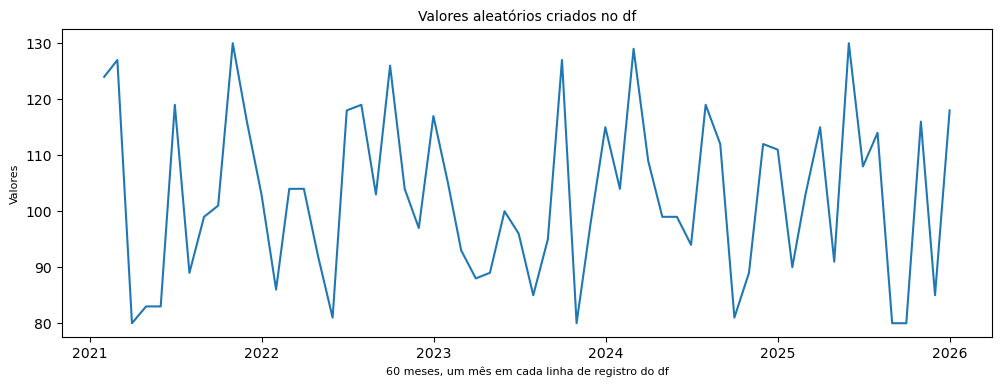

In [7]:
#Visualizando o que foi criado...

plt.figure(figsize=(12, 4)) # (largura, altura)
sns.lineplot(x="date", y="value"
             ,data=df)
plt.title('Valores aleatórios criados no df',fontsize=10) 
plt.xlabel('60 meses, um mês em cada linha de registro do df',fontsize=8) 
plt.ylabel('Valores',fontsize=8) 

<Axes: xlabel='value', ylabel='Count'>

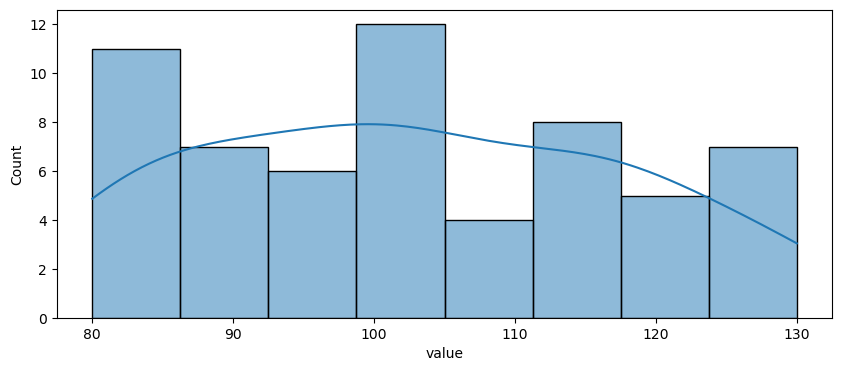

In [8]:
# Uma visão de histograma
plt.figure(figsize=(10, 4)) # (largura, altura)
sns.histplot(data=df, x="value"
            #,binwidth=6
            ,bins=8
            ,kde=True
            #,element="poly"
            #,element='step'
            #,hue="event" # separa em grupos pelos atributos de coluna
            #,err_style="bars",errorbar=("se", 2)
            #,estimator=None, lw=1
            #,stat="density" # Alterna a quantidade para a densidade %
            #,stat="percent"
            #,discrete=True
            #,discrete=(True, True), log_scale=(True, True) # entra com os pares x,y
            #,common_norm=True
            #,shrink=2    # espaçamento
            #,multiple="dodge"
            #,log_scale=True # escala no x fica em logaritimo
            #,fill=False # preenchimento false = vazio (fica só as bordas)
            #,hue_order=["Radial Velocity", "Transit"],#ordem em que as colunas aparecem
            #,legend=False
            #,cumulative=True
            #,thresh=None
            #,pthresh=.05, pmax=.9
            #,cbar=True, cbar_kws=dict(shrink=.75) # barra de densidade fora do gráfico
            )

In [9]:
# Calculando o indicador "sw" (abreviatura de gangorra em inglês - (seesaw) ) - Média Móvel 6m 3a3
# É um comparativo dos últimos 3 meses comparado aos 3 anteriores
# Se positivo, indica que cresceu e o percetual é o próprio crescimento. Da mesma forma a indicação de queda.
sw_values = []

for i in range(len(df)):
    if i < 3:
        sw_values.append(np.nan)  # Para os primeiros 3 meses, não temos dados suficientes para calcular "sw"
    else:
        sw = df.iloc[i]['value'] + df.iloc[i - 1]['value'] + df.iloc[i - 2]['value']
        sw /= (df.iloc[i - 3]['value'] + df.iloc[i - 4]['value'] + df.iloc[i - 5]['value'])
        sw_values.append(sw)

# Adicionando a coluna "sw" ao DataFrame
df['sw'] = sw_values

df.head(10)

,date,value,sw
0,2021-01-31,124,NaN
1,2021-02-28,127,NaN
2,2021-03-31,80,NaN
3,2021-04-30,83,0.886850
4,2021-05-31,83,0.666667
5,2021-06-30,119,0.861027
6,2021-07-31,89,1.003448
7,2021-08-31,99,1.247967
8,2021-09-30,101,1.014035
9,2021-10-31,130,1.134021


In [10]:
# corrigir os nulos para zero
#df['sw']=df['sw'].fillna(value=0)

# Para fins estatísticos o sw ficará melhor com a média.
df['sw']=df['sw'].fillna(df['sw'].mean())

In [11]:
df.head(6)

,date,value,sw
0,2021-01-31,124,0.999053
1,2021-02-28,127,0.999053
2,2021-03-31,80,0.999053
3,2021-04-30,83,0.886850
4,2021-05-31,83,0.666667
5,2021-06-30,119,0.861027


In [12]:
# Enviar para o excel para dar uma olhada...
# Em windows fica salvo normalmente em C:\Users\'seu usuário do windows' [[padrão de instalação do Anaconda]]
df.to_excel('z-score atributo.xlsx', index=False)

In [13]:
# Calculando a média e o desvio padrão dos [valores] (não da SW)
value_mean = df['value'].mean()
value_std = df['value'].std()

# Calculando o valor Z para cada valor de "sw"
df['z_value'] = (df['value'] - value_mean) / value_std

df.head(6)

,date,value,sw,z_value
0,2021-01-31,124,0.999053,1.422245
1,2021-02-28,127,0.999053,1.622875
2,2021-03-31,80,0.999053,-1.520331
3,2021-04-30,83,0.886850,-1.319701
4,2021-05-31,83,0.666667,-1.319701
5,2021-06-30,119,0.861027,1.087862


In [14]:
# Calculando a média e o desvio padrão de SW)
sw_mean = df['sw'].mean()
sw_std = df['sw'].std()

# Calculando o valor Z para cada valor de "sw"
df['z_sw'] = (df['sw'] - sw_mean) / sw_std

df.head(6)

,date,value,sw,z_value,z_sw
0,2021-01-31,124,0.999053,1.422245,0.000000
1,2021-02-28,127,0.999053,1.622875,0.000000
2,2021-03-31,80,0.999053,-1.520331,0.000000
3,2021-04-30,83,0.886850,-1.319701,-0.949585
4,2021-05-31,83,0.666667,-1.319701,-2.813022
5,2021-06-30,119,0.861027,1.087862,-1.168128


In [16]:
# Atribuindo a descrição categórica com base nos valores Z
def cria_z_score(z_score):
    if z_score < -0.5:
        return 'Baixa'
    elif z_score >= -0.5 and z_score <= 0.5:
        return 'Média'
    else:
        return 'Alta'

    # zd = Score Z e D descritivo
df['zd_value'] = df['z_value'].apply(cria_z_score)

# Visualizando o DataFrame com a nova coluna
df.head(6)

,date,value,sw,z_value,z_sw,zd_value
0,2021-01-31,124,0.999053,1.422245,0.000000,Alta
1,2021-02-28,127,0.999053,1.622875,0.000000,Alta
2,2021-03-31,80,0.999053,-1.520331,0.000000,Baixa
3,2021-04-30,83,0.886850,-1.319701,-0.949585,Baixa
4,2021-05-31,83,0.666667,-1.319701,-2.813022,Baixa
5,2021-06-30,119,0.861027,1.087862,-1.168128,Alta


In [17]:
# Atribuindo a descrição categórica com base nos valores Z
def cria_z_score(z_score):
    if z_score < -0.5:
        return 'Baixa'
    elif z_score >= -0.5 and z_score <= 0.5:
        return 'Média'
    else:
        return 'Alta'

df['zd_sw'] = df['z_sw'].apply(cria_z_score)

# Visualizando o DataFrame com a nova coluna
df.head(6)

,date,value,sw,z_value,z_sw,zd_value,zd_sw
0,2021-01-31,124,0.999053,1.422245,0.000000,Alta,Média
1,2021-02-28,127,0.999053,1.622875,0.000000,Alta,Média
2,2021-03-31,80,0.999053,-1.520331,0.000000,Baixa,Média
3,2021-04-30,83,0.886850,-1.319701,-0.949585,Baixa,Baixa
4,2021-05-31,83,0.666667,-1.319701,-2.813022,Baixa,Baixa
5,2021-06-30,119,0.861027,1.087862,-1.168128,Alta,Baixa


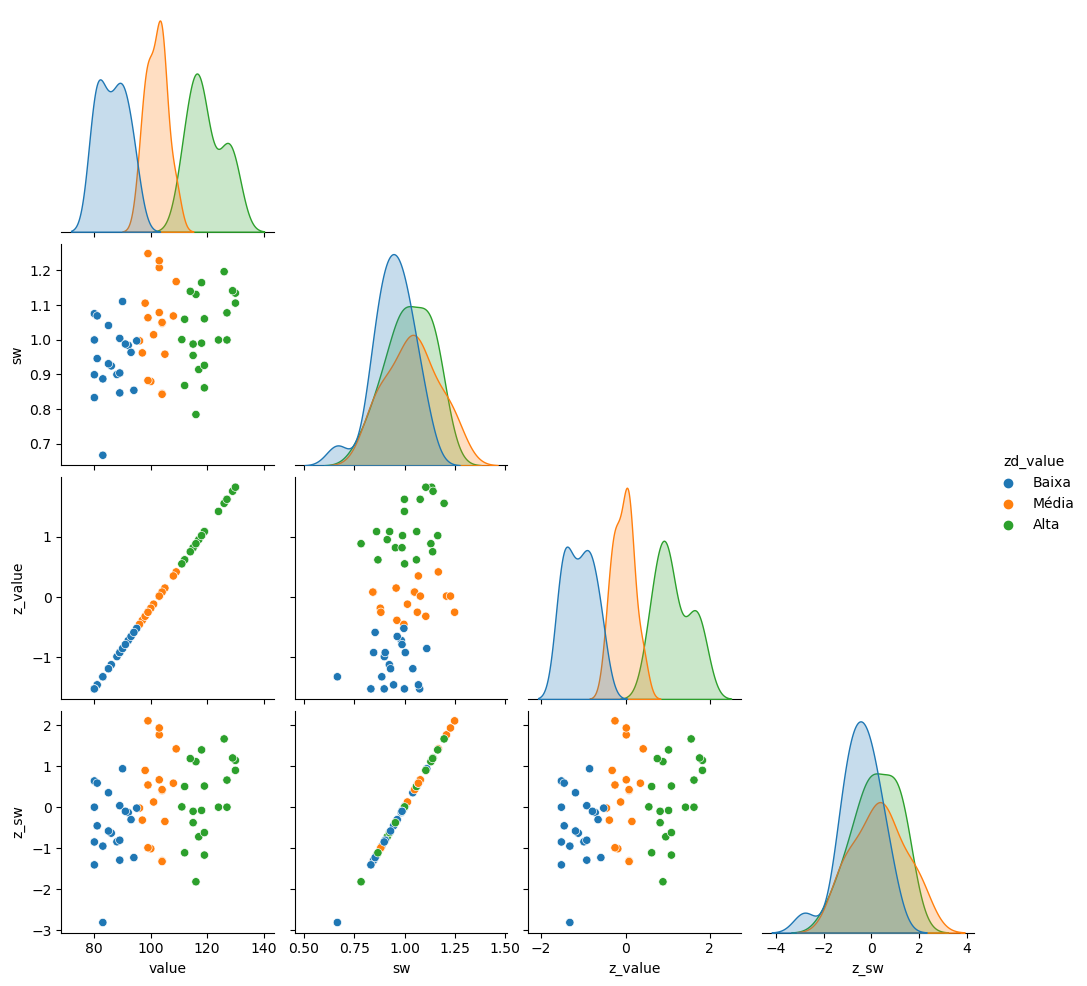

In [18]:
sns.pairplot(df, corner=True, hue='zd_value', hue_order=['Baixa','Média','Alta'])

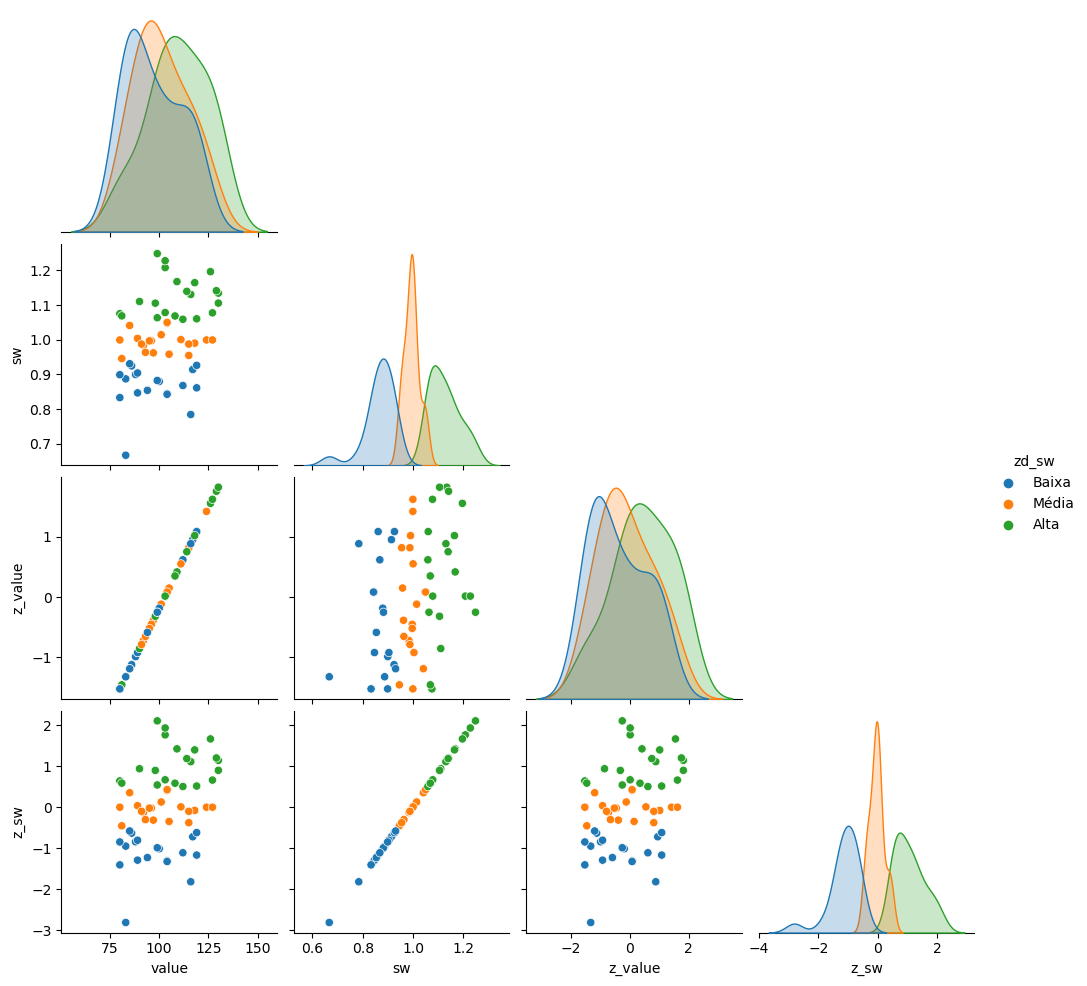

In [19]:
sns.pairplot(df, corner=True, hue='zd_sw', hue_order=['Baixa','Média','Alta'])

<Axes: >

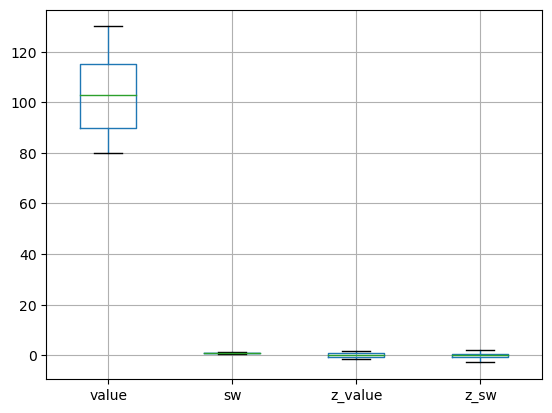

In [22]:
df.boxplot(column=['value','sw','z_value','z_sw'])

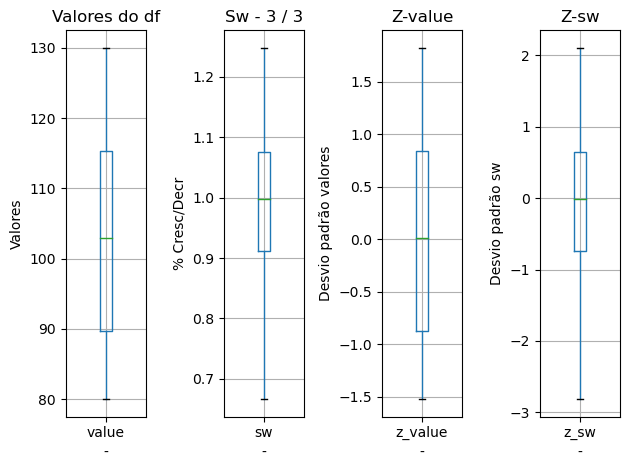

In [23]:
plt.subplot(1, 4, 1) # (1,4,1)=(linhas,colunas,posição)
df.boxplot(column=['value'])
plt.title('Valores do df') 
plt.xlabel('-') 
plt.ylabel('Valores') 
plt.subplot(1, 4, 2) 
df.boxplot(column=['sw'])
plt.title('Sw - 3 / 3') 
plt.xlabel('-') 
plt.ylabel('% Cresc/Decr') 
plt.subplot(1, 4, 3) 
df.boxplot(column=['z_value'])
plt.title('Z-value') 
plt.xlabel('-') 
plt.ylabel('Desvio padrão valores') 
plt.subplot(1, 4, 4) 
df.boxplot(column=['z_sw'])
plt.title('Z-sw') 
plt.xlabel('-') 
plt.ylabel('Desvio padrão sw') 


plt.tight_layout() # melhora o espaçamento
plt.show()

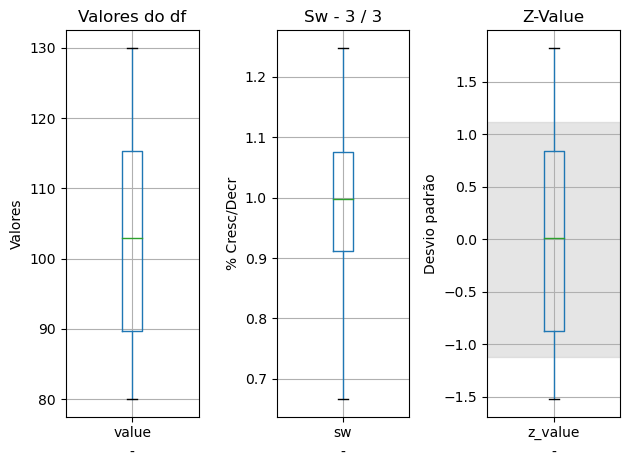

In [24]:
plt.subplot(1, 3, 1) 
df.boxplot(column=['value'])
plt.title('Valores do df') 
plt.xlabel('-') 
plt.ylabel('Valores') 
plt.subplot(1, 3, 2) 
df.boxplot(column=['sw'])
plt.title('Sw - 3 / 3') 
plt.xlabel('-') 
plt.ylabel('% Cresc/Decr') 
plt.subplot(1, 3, 3) 
df.boxplot(column=['z_value'])
plt.title('Z-Value') 
plt.xlabel('-') 
plt.ylabel('Desvio padrão') 
#plt.axvspan(xmin=1.5, xmax=1.75, ymin=0, ymax=2, color='#d9d9d9', alpha=0.5) #marca uma área do gráfico VERTICAL
plt.axhspan(ymin=-(sw_mean + sw_std), ymax=(sw_mean + sw_std)
            ,color='#ccc' # R G B
            ,alpha=.5 # transparencia, 0.1 muito transparente, .9 nada transparente
           ) #marca uma área do gráfico HORIZONTAL

plt.tight_layout() # melhora o espaçamento
plt.show()

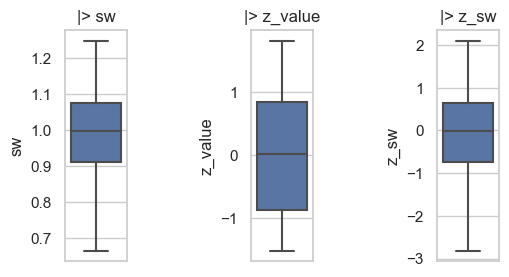

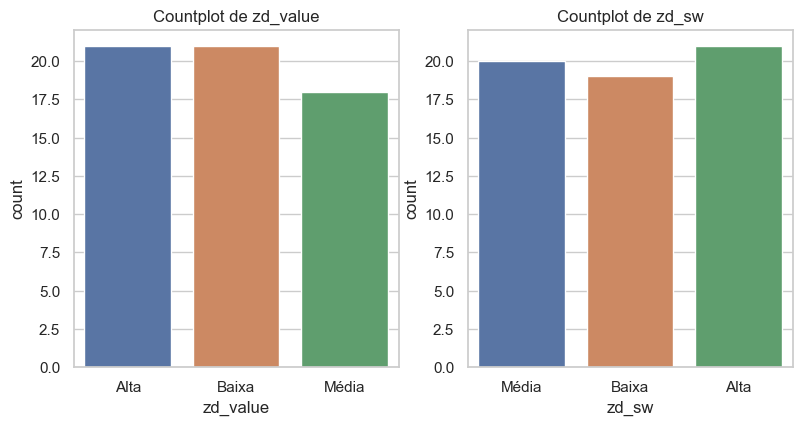

In [25]:
# Define o estilo do seaborn
sns.set(style="whitegrid")

# Obtém as colunas numéricas e categóricas separadamente
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
categorical_columns = df.select_dtypes(include=['category', 'object'])

# Define o tamanho da figura
plt.figure(figsize=(8, 12))

# Itera sobre cada coluna numérica do DataFrame

for i, column in enumerate(numeric_columns.columns):
    plt.subplot(3, 4, i+1)  # Ajusta o layout dos subplots conforme necessário
    sns.boxplot(y=column, data=df)  # Cria um boxplot para a coluna atual
    
    # Adiciona título à subplot
    plt.title(f"|> {column}")

# Ajusta o espaço entre os subplots verticais
plt.subplots_adjust(hspace=.5, wspace=2)

# Define o tamanho da figura
plt.figure(figsize=(12, 12))

# Itera sobre cada coluna categórica do DataFrame

for i, column in enumerate(categorical_columns.columns):
    plt.subplot(3, 3, i+1)  # Ajusta o layout dos subplots conforme necessário
    sns.countplot(x=column, data=df)  # Cria um countplot para a coluna atual
    
    # Adiciona título à subplot
    plt.title(f"Countplot de {column}")

# Ajusta o layout da figura e exibe os gráficos
plt.tight_layout()
plt.show()


In [26]:
df.head(6)

,date,value,sw,z_value,z_sw,zd_value,zd_sw
0,2021-01-31,124,0.999053,1.422245,0.000000,Alta,Média
1,2021-02-28,127,0.999053,1.622875,0.000000,Alta,Média
2,2021-03-31,80,0.999053,-1.520331,0.000000,Baixa,Média
3,2021-04-30,83,0.886850,-1.319701,-0.949585,Baixa,Baixa
4,2021-05-31,83,0.666667,-1.319701,-2.813022,Baixa,Baixa
5,2021-06-30,119,0.861027,1.087862,-1.168128,Alta,Baixa


In [27]:
# Atribuindo a descrição categórica com base nos valores Z
def categorize_z_score(z_score):
    if z_score > -0.5 and z_score <= 0.5:
        return 'Estável'
    elif z_score > 0.5 and z_score <= 1:
        return 'Pouco alto'
    elif z_score > 1:
        return 'Muito alto'
    elif z_score > -1 and z_score <= -0.5:
        return 'Pouco baixo'
    else:
        return 'Muito baixo'

df['zf_value'] = df['z_value'].apply(categorize_z_score)

# Visualizando o DataFrame com a nova coluna
print(df)


         date  value        sw   z_value      z_sw zd_value  zd_sw  \
0  2021-01-31    124  0.999053  1.422245  0.000000     Alta  Média   
1  2021-02-28    127  0.999053  1.622875  0.000000     Alta  Média   
2  2021-03-31     80  0.999053 -1.520331  0.000000    Baixa  Média   
3  2021-04-30     83  0.886850 -1.319701 -0.949585    Baixa  Baixa   
4  2021-05-31     83  0.666667 -1.319701 -2.813022    Baixa  Baixa   
5  2021-06-30    119  0.861027  1.087862 -1.168128     Alta  Baixa   
6  2021-07-31     89  1.003448 -0.918441  0.037197    Baixa  Média   
7  2021-08-31     99  1.247967 -0.249673  2.106590    Média   Alta   
8  2021-09-30    101  1.014035 -0.115920  0.126795    Média  Média   
9  2021-10-31    130  1.134021  1.823506  1.142245     Alta   Alta   
10 2021-11-30    116  1.130293  0.887231  1.110699     Alta   Alta   
11 2021-12-31    103  1.207612  0.017834  1.765061    Média   Alta   
12 2022-01-31     86  0.924242 -1.119071 -0.633130    Baixa  Baixa   
13 2022-02-28    104

In [29]:
# Atribuindo a descrição categórica com base nos valores Z
def categorize_z_score(z_score):
    if z_score > -0.5 and z_score <= 0.5:
        return 'Estável'
    elif z_score > 0.5 and z_score <= 1:
        return 'Pouco alto'
    elif z_score > 1:
        return 'Muito alto'
    elif z_score > -1 and z_score <= -0.5:
        return 'Pouco baixo'
    else:
        return 'Muito baixo'

df['zf_sw'] = df['z_sw'].apply(categorize_z_score)

# Visualizando o DataFrame com a nova coluna
print(df)

         date  value        sw   z_value      z_sw zd_value  zd_sw  \
0  2021-01-31    124  0.999053  1.422245  0.000000     Alta  Média   
1  2021-02-28    127  0.999053  1.622875  0.000000     Alta  Média   
2  2021-03-31     80  0.999053 -1.520331  0.000000    Baixa  Média   
3  2021-04-30     83  0.886850 -1.319701 -0.949585    Baixa  Baixa   
4  2021-05-31     83  0.666667 -1.319701 -2.813022    Baixa  Baixa   
5  2021-06-30    119  0.861027  1.087862 -1.168128     Alta  Baixa   
6  2021-07-31     89  1.003448 -0.918441  0.037197    Baixa  Média   
7  2021-08-31     99  1.247967 -0.249673  2.106590    Média   Alta   
8  2021-09-30    101  1.014035 -0.115920  0.126795    Média  Média   
9  2021-10-31    130  1.134021  1.823506  1.142245     Alta   Alta   
10 2021-11-30    116  1.130293  0.887231  1.110699     Alta   Alta   
11 2021-12-31    103  1.207612  0.017834  1.765061    Média   Alta   
12 2022-01-31     86  0.924242 -1.119071 -0.633130    Baixa  Baixa   
13 2022-02-28    104

In [30]:
# Enviar para o excel para dar uma olhada...
df.to_excel('z-score atributo.xlsx', index=False)

ValueError: num must be an integer with 1 <= num <= 3, not 4

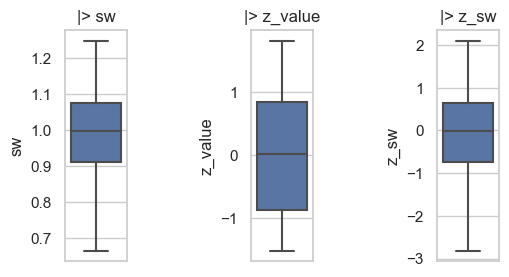

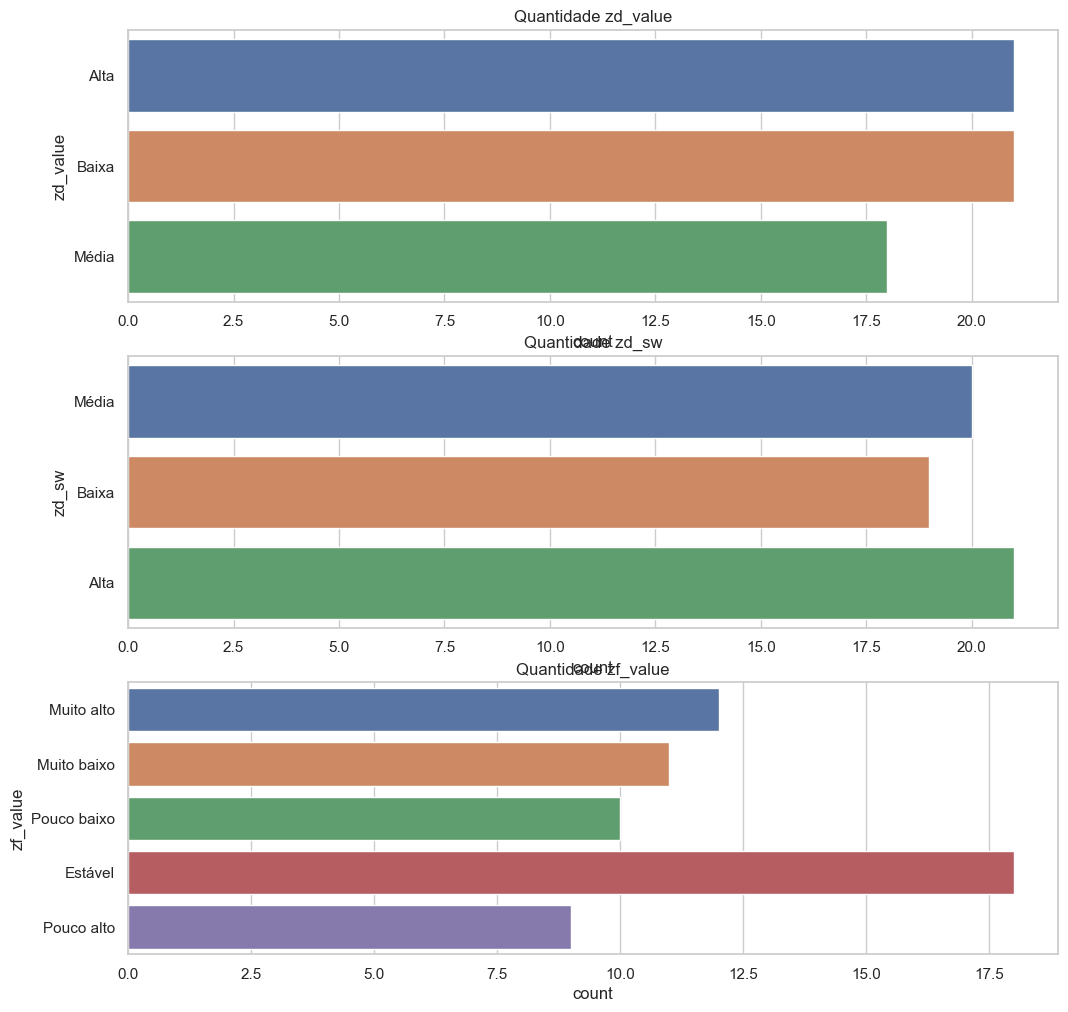

In [31]:
# Define o estilo do seaborn
sns.set(style="whitegrid")

# Obtém as colunas numéricas e categóricas separadamente
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
categorical_columns = df.select_dtypes(include=['category', 'object'])

# Define o tamanho da figura
plt.figure(figsize=(8, 12))

# Itera sobre cada coluna numérica do DataFrame
for i, column in enumerate(numeric_columns.columns):
    plt.subplot(3, 4, i+1)  # Ajusta o layout dos subplots conforme necessário
    sns.boxplot(y=column, data=df)  # Cria um boxplot para a coluna atual
    
    # Adiciona título à subplot
    plt.title(f"|> {column}")

# Ajusta o espaço entre os subplots verticais
plt.subplots_adjust(hspace=.5, wspace=2)

# Define o tamanho da figura
plt.figure(figsize=(12, 12))

# Itera sobre cada coluna categórica do DataFrame
for i, column in enumerate(categorical_columns.columns):
    plt.subplot(3, 1, i+1)  # Ajusta o layout dos subplots conforme necessário
    sns.countplot(y=column, data=df)  # Cria um countplot para a coluna atual
    
    # Adiciona título à subplot
    plt.title(f"Quantidade {column}")


# Ajusta o layout da figura e exibe os gráficos
plt.tight_layout()
plt.show()


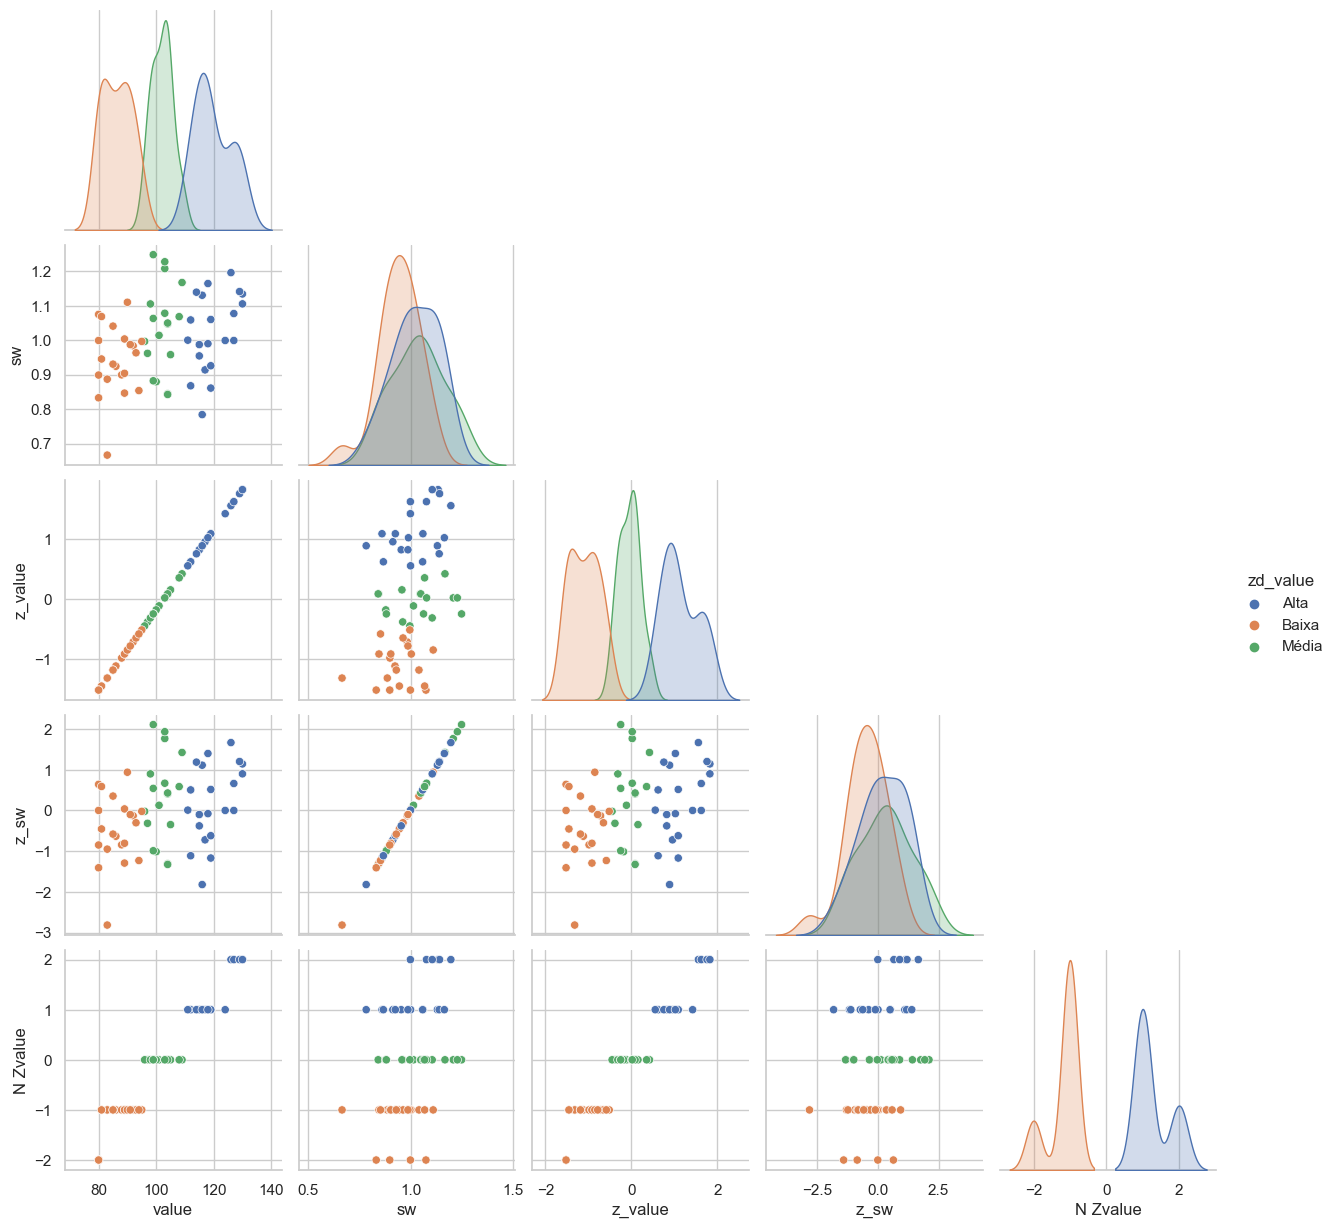

In [50]:
sns.pairplot(df, corner=True, hue='zd_value'
             #, hue_order=['Pouco alto','Pouco baixo','Estável','Muito baixo','Muito alto']
            )

In [34]:
# Estável não aparece porque estamos com muitas casas depois da vírgula. Vamos Truncar.

In [35]:
import math

# Arredondar os valores Z para zero casas
df['N Zvalue'] = df['z_value'].apply(lambda x: round(x,0))

# Truncar os valores Z para duas casas decimais
#df['truncated_z_score'] = df['z_score'].apply(lambda x: math.trunc(x))

# Truncar os valores Z para duas casas decimais
#df['trunc_sw'] = df['sw'].apply(lambda x: math.trunc(x))

# Truncar os valores Z para duas casas decimais
#df['trunc_sw2'] = df['sw'].apply(lambda x: math.trunc(x))

#df['truncated_z_score2'] = df['z_score'].apply(lambda x: int(x * 100) / 100)


# Visualizar o DataFrame com as novas colunas
print(df)

         date  value        sw   z_value      z_sw zd_value  zd_sw  \
0  2021-01-31    124  0.999053  1.422245  0.000000     Alta  Média   
1  2021-02-28    127  0.999053  1.622875  0.000000     Alta  Média   
2  2021-03-31     80  0.999053 -1.520331  0.000000    Baixa  Média   
3  2021-04-30     83  0.886850 -1.319701 -0.949585    Baixa  Baixa   
4  2021-05-31     83  0.666667 -1.319701 -2.813022    Baixa  Baixa   
5  2021-06-30    119  0.861027  1.087862 -1.168128     Alta  Baixa   
6  2021-07-31     89  1.003448 -0.918441  0.037197    Baixa  Média   
7  2021-08-31     99  1.247967 -0.249673  2.106590    Média   Alta   
8  2021-09-30    101  1.014035 -0.115920  0.126795    Média  Média   
9  2021-10-31    130  1.134021  1.823506  1.142245     Alta   Alta   
10 2021-11-30    116  1.130293  0.887231  1.110699     Alta   Alta   
11 2021-12-31    103  1.207612  0.017834  1.765061    Média   Alta   
12 2022-01-31     86  0.924242 -1.119071 -0.633130    Baixa  Baixa   
13 2022-02-28    104

<Axes: xlabel='zd_value', ylabel='value'>

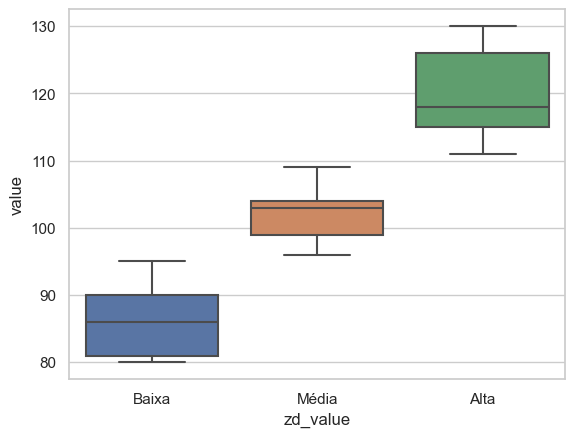

In [39]:
sns.boxplot(data=df
            ,y='value', x='zd_value'
            ,order=['Baixa','Média','Alta']
           # ,order=['Pouco alto','Pouco baixo','Estável','Muito baixo','Muito alto']
           )

<Axes: xlabel='zd_sw', ylabel='value'>

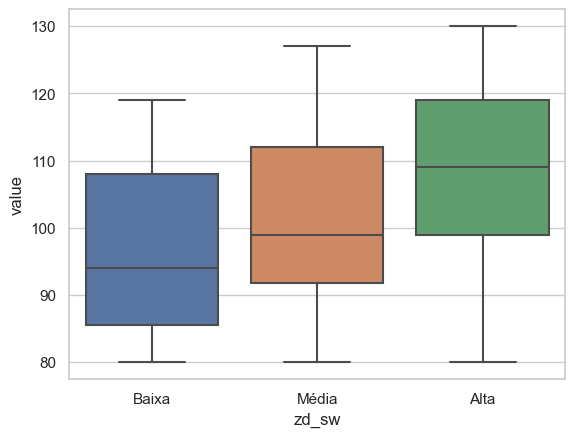

In [51]:
sns.boxplot(data=df
            ,y='value', x='zd_sw'
            ,order=['Baixa','Média','Alta']
           # ,order=['Pouco alto','Pouco baixo','Estável','Muito baixo','Muito alto']
           )

<Axes: xlabel='zf_sw', ylabel='value'>

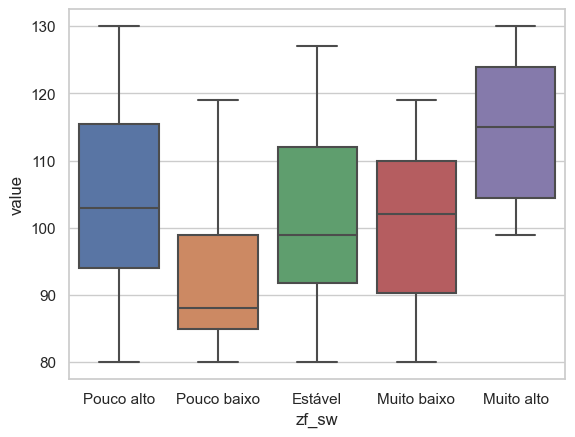

In [52]:
sns.boxplot(data=df
            ,y='value', x='zf_sw'
            ,order=['Pouco alto','Pouco baixo','Estável','Muito baixo','Muito alto']
           )

Text(0, 0.5, 'Z valores')

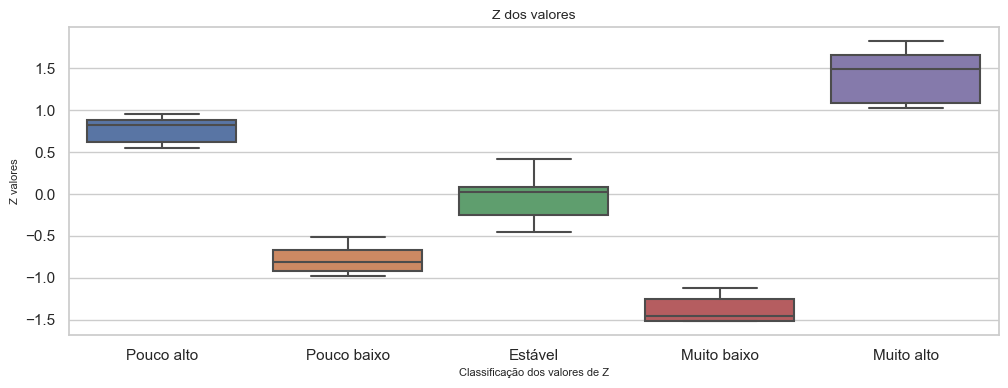

In [56]:

plt.figure(figsize=(12, 4)) # (largura, altura)
sns.boxplot(data=df
            ,y='z_value', x='zf_value'
            ,order=['Pouco alto','Pouco baixo','Estável','Muito baixo','Muito alto']
           )
plt.title('Z dos valores',fontsize=10) 
plt.xlabel('Classificação dos valores de Z',fontsize=8) 
plt.ylabel('Z valores',fontsize=8) 


In [42]:
df.groupby('zd_value').min()

,date,value,sw,z_value,z_sw,zd_sw,zf_value,zf_sw,N Zvalue
zd_value,,,,,,,,,
Alta,2021-01-31,111,0.784091,0.552848,-1.819248,Alta,Muito alto,Estável,1.0
Baixa,2021-03-31,80,0.666667,-1.520331,-2.813022,Alta,Muito baixo,Estável,-2.0
Média,2021-08-31,96,0.842407,-0.450303,-1.325713,Alta,Estável,Estável,-0.0


In [43]:
df.groupby('zd_value').max()

,date,value,sw,z_value,z_sw,zd_sw,zf_value,zf_sw,N Zvalue
zd_value,,,,,,,,,
Alta,2025-12-31,130,1.195876,1.823506,1.665736,Média,Pouco alto,Pouco baixo,2.0
Baixa,2025-11-30,95,1.109929,-0.517180,0.938356,Média,Pouco baixo,Pouco baixo,-1.0
Média,2025-06-30,109,1.247967,0.419094,2.106590,Média,Estável,Pouco baixo,-0.0


In [67]:
# Amostra 
df.groupby('zd_value').sample()

,date,value,sw,z_value,z_sw,zd_value,zd_sw,zf_value,zf_sw,N Zvalue
57,2025-10-31,116,0.784091,0.887231,-1.819248,Alta,Baixa,Pouco alto,Muito baixo,1.0
27,2023-04-30,89,0.846395,-0.918441,-1.291962,Baixa,Baixa,Pouco baixo,Muito baixo,-1.0
29,2023-06-30,96,0.996503,-0.450303,-0.021577,Média,Média,Estável,Estável,-0.0


In [49]:
df.groupby('zd_value')['value'].describe().sort_values(by='max',ascending=False)

,count,mean,std,min,25%,50%,75%,max
zd_value,,,,,,,,
Alta,21.0,119.714286,6.230111,111.0,115.0,118.0,126.0,130.0
Média,18.0,102.000000,3.613699,96.0,99.0,103.0,104.0,109.0
Baixa,21.0,86.380952,5.064348,80.0,81.0,86.0,90.0,95.0
